***第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．
なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．***

In [2]:
#マッピング型（dict）
#MeCabの使い方を知るために色々試してみる

import MeCab
text = "吾輩は猫である。名前はまだ無い。"

#Taggerオブジェクトで文章を単語に分割
#-o:-output-format-type ,形態素解析ではパラメーターをchasen:ChaSen互換に指定

'''
Taggerのインスタンスメソッド
(Taggerインスタンス）.parse("")で文字列の単語の形態素のリストが生成される
単語情報：品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音
'''

mecab = MeCab.Tagger("-Ochasen")
mecab.parse('')
result = mecab.parse(text)
print(result)

'''
(Taggerインスタンス).parseToNode("")でNodeオブジェクトが返る
Nodeのプロパティ　feature（単語情報）/surface（表層形）
'''
node = mecab.parseToNode(text)
while node:
    print(node.surface,node.feature)
    node = node.next
    

吾輩	ワガハイ	吾輩	名詞-代名詞-一般		
は	ハ	は	助詞-係助詞		
猫	ネコ	猫	名詞-一般		
で	デ	だ	助動詞	特殊・ダ	連用形
ある	アル	ある	助動詞	五段・ラ行アル	基本形
。	。	。	記号-句点		
名前	ナマエ	名前	名詞-一般		
は	ハ	は	助詞-係助詞		
まだ	マダ	まだ	副詞-助詞類接続		
無い	ナイ	無い	形容詞-自立	形容詞・アウオ段	基本形
。	。	。	記号-句点		
EOS

 BOS/EOS,*,*,*,*,*,*,*,*
吾輩 名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は 助詞,係助詞,*,*,*,*,は,ハ,ワ
猫 名詞,一般,*,*,*,*,猫,ネコ,ネコ
で 助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある 助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。 記号,句点,*,*,*,*,。,。,。
名前 名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は 助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ 副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い 形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。 記号,句点,*,*,*,*,。,。,。
 BOS/EOS,*,*,*,*,*,*,*,*


In [3]:
! mecab neko.txt -o neko.txt.mecab
! head -n 20 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ


30.形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
#形態素解析結果を読み込む関数 analyze_neko()
#sentenceというリストに、１文ごとの表層形と形態素を格納
#ジェネレータで１文が終わるごとに新しいリストを作りたい

import re

def analyze_neko():
    with open("neko.txt.mecab") as f:
        sentence = []
        for line in f:
       
            #re.split()　\t ,\n で分割し、dataというリストを返す
            #line=line.rstrip()で空白が消えるよ！EOSの行は形態素がないからdata[0]にする必要なくない？
            #if line =="EOS":ってすると無駄な処理消えるよ
            '''
            例えば
            if line =="EOS":
               yield
               s = []
            elif line  == ""
               continue
            else:
               data = ここでsplit
            '''
            
            data = re.split(r"[\t,\n]",line)
            
            surface = data[0]
            
            #表層形がEOS以外の時、形態素を格納したdicをsentenceに追加する
            if surface != "EOS":
                dic = {"surface":data[0],"base":data[7],"pos":data[1],"pos1":data[2]}
                sentence.append(dic)
                
            #表層形がEOSの時、ジェネレーターでsentenceを返した後にsentenceというリストを空にする
            else:
                yield sentence
                sentence = []
                #.clearでリストが空になる
               #continue いらない、なぜならEOSで次の行に行くから！
                
            
count  = 0
for sentence in analyze_neko():
    #sentenceが空だったらprintしない
    if sentence == []:
        continue
    if count > 5:
        break
    print(sentence,"\n")
    count += 1
    
#isliceが使える！ 
#if sentence != []: →print


[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}] 

[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}] 

[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}] 

[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'bas

31.動詞
動詞の表層形をすべて抽出せよ．

In [5]:
result = analyze_neko()

verb_surface = [] #sいるよ
for sentence in result:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verb_surface.append(morpheme["surface"])
            
#なんと内包表記で1行で書けちゃうらしい
#[morpheme["surface"] for sentence in result for morpheme in sentence if morpheme["pos"] == "動詞"]


print(verb_surface[:10])
                

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']


32.動詞の原形
動詞の原形をすべて抽出せよ．

In [6]:
result = analyze_neko()

verb_base = []
for sentence in result:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verb_base.append(morpheme["base"])

print(verb_base[:10])             

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']


33.「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [7]:
result = analyze_neko() #なくてもいいよ

#名詞+の(助詞+名詞
noun_phrase = []
for sentence in result:
    #3つの形態素をひとまとまりで考えるので、名詞句を探すのは(sentence-2)の長さの範囲
    for i in range(len(sentence)-2):
        if sentence[i]["pos"] == "名詞" and sentence[i+1]["base"] == "の" and sentence[i+2]["pos"] == "名詞":
            noun_phrase.append(sentence[i]["surface"]+sentence[i+1]["surface"]+sentence[i+2]["surface"])

print(noun_phrase[:10])


['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']


*34.名詞の連接 
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．*

In [8]:
result = analyze_neko()
series_of_noun = []
nouns = []

for sentence in result:
    for morpheme in sentence:
        #形態素が名詞の時、名詞をnounsというリストに溜める
        if morpheme["pos"] == "名詞":
            nouns.append(morpheme["surface"])
            
            #形態素が名詞で名詞と連接する、かつ文末に来る時
            #nounsに名詞を溜めたのちにリストを空にする
            
            
            
        elif len(nouns)>1:
            series_of_noun.append("".join(nouns))
            nouns = []
            #名詞以外の形態素,あるいは名詞が連接しない時
            #nouns内の名詞をひとまとまりに直してからリストを空にする
            
            #elifにする→その時はelseを置く
        else:
            nouns = []
            
    if len(nouns)>1:
        series_of_noun.append("".join(nouns))
        nouns = []
        #if sentence[-1]~いらない 、for分の外に出す   

print(series_of_noun[:10])

#複合名詞：compound_nouns

#for nouns in islise(nounslist,10):

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外']


35.単語の出現頻度
>文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
#単語→自立形態素と非自立形態素に分けられるようだが、これはどう判別できるのか？
#表層形をみるのかそれとも基本形をみるのか？→基本形で出現頻度を求めてみる
#collectionモジュールのCounterオブジェクトでリストの要素の個数をカウントできる

from collections import Counter
result = analyze_neko()
words_base = []

for sentence in result:
    for morpheme in sentence:
        if morpheme["pos"] != "記号":
            words_base.append(morpheme["base"])
            #内包表記しよう！！！
        
#あとで使いやすくするために名前をつける
frequency = Counter(words_base).most_common()
print(frequency[:10])

[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5975), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657)]


***36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．***

In [12]:
#rcParamsというオブジェクトにあるデフォルト設定を確認すると、フォントはsans-serifになっており、日本語は文字化けする
import matplotlib as mpl
print(mpl.rcParams['font.family'])

['Hiragino Sans']


In [13]:
#フォントファイルのリストを調べる
import matplotlib.font_manager
print(matplotlib.font_manager.findSystemFonts(fontpaths=None,fontext='ttf')[:10])
#長いので省略して表示

['/System/Library/Fonts/ZapfDingbats.ttf', '/Library/Fonts/DIN Alternate Bold.ttf', '/Library/Fonts/KufiStandardGK.ttc', '/System/Library/Fonts/KohinoorBangla.ttc', '/System/Library/Fonts/SFCompactDisplay-Heavy.otf', '/Library/Fonts/Mishafi Gold.ttf', '/Library/Fonts/Comic Sans MS Bold.ttf', '/Library/Fonts/Oriya Sangam MN.ttc', '/System/Library/Fonts/Keyboard.ttf', '/Library/Fonts/Kailasa.ttc']


In [14]:
#フォントの指定方法を調べる
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist][:10])
#長いので省略して表示

['cmr10', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Sans', 'STIXSizeThreeSym', 'DejaVu Sans Mono']


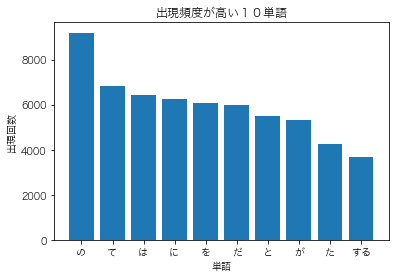

In [32]:
#matplotlibはpythonの描画ライブラリ。pyplotはその中のモジュール。

import matplotlib as mpl
import matplotlib.pyplot as plt

words,figures = list(zip(*frequency))
#[('の', 'て', 'は',...),(9194, 6848, 6420,...)]

#日本語が文字化けしないフォントを指定
mpl.rcParams["font.family"] = "Hiragino Sans"

x = words[:10]
y = figures[:10]
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(x,y)
ax.set_title("出現頻度が高い１０単語")
ax.set_xlabel("単語")
ax.set_ylabel("出現回数")

plt.show()

37.「猫」と共起頻度の高い上位10位
>「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

[('の', 391), ('は', 272), ('に', 250), ('を', 232), ('だ', 231), ('て', 229), ('と', 202), ('が', 180), ('する', 144), ('た', 140)]


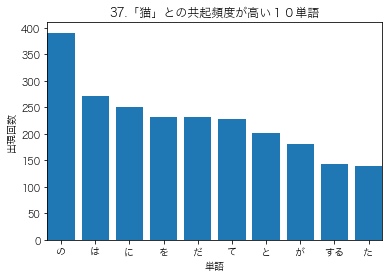

In [77]:
#共起するということは、「猫」を含む文章に出現する単語のことだと解釈
#ここでは基本形で考えることにする

article = analyze_neko()
from collections import Counter
cooccur_with_neko = []

#「猫」を含む文を抽出し、猫以外の単語をリストに結合してカウントする
for sentence in article:
        if any(morph["base"] == "猫" for morph in sentence):
            words = [morph["base"] for morph in sentence if morph["pos"] != "記号" and morph["base"] != "猫"]
            cooccur_with_neko.extend(words) 
            
frequency_cooccur_with_neko = Counter(cooccur_with_neko).most_common()
print(frequency_cooccur_with_neko[:10])

#出現頻度の可視化
words,figures = list(zip(*frequency_cooccur_with_neko))
#[('の', 'て', 'は',...),(391,272, 250,...)]

#日本語が文字化けしないフォントを指定
mpl.rcParams["font.family"] = "Hiragino Sans"

x = words[:10]
y = figures[:10]
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(x,y)
ax.set_title("37.「猫」との共起頻度が高い１０単語")
ax.set_xlabel("単語")
ax.set_ylabel("出現回数")

plt.show()


38.ヒストグラム
>単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

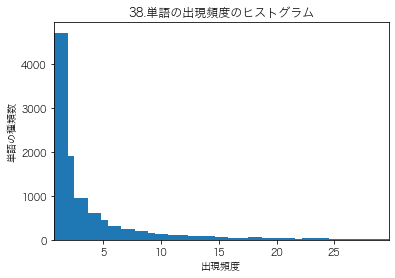

In [75]:
#words,figures = list(zip(*frequency))

words,figures = list(zip(*frequency))
#[('の', 'て', 'は',...),(9194, 6848, 6420,...)]

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(figures,bins=50,range = (1,30),align='left',width=1.2)
mpl.rcParams["axes.xmargin"] = 0
ax.set_title("38.単語の出現頻度のヒストグラム")
ax.set_xlabel("出現頻度")
ax.set_ylabel("単語の種類数")

plt.show()

39.Zipfの法則
>単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

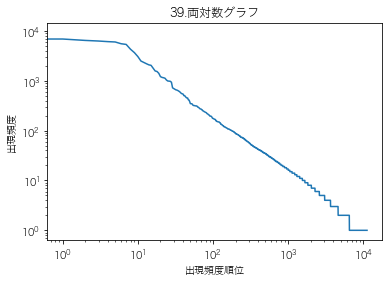

In [45]:
#両対数グラフ→グラフの両方の軸が対数目盛になっているグラフ
#words,figures = list(zip(*frequency)
number_of_appearance = list(zip(*frequency))[1]

#順位情報、頻度情報のリストを用意、x,yとして引数に指定する

plt.plot(number_of_appearance)
plt.xscale("log")
plt.yscale("log")
plt.title("39.両対数グラフ")
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")

plt.show()